# 1 - Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from IPython.display import Image 
import warnings
warnings.filterwarnings('ignore')
plt.close('all')
import os
if not os.path.exists('MLPNN_Results'):
    os.makedirs('MLPNN_Results')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 2 - Importing Data-Set

In [3]:
dataset = pd.read_excel('C:/Users/SONY/Desktop/Master-Thesis/New code/DatasetN.xlsx')

rows = dataset.shape[0]
cols = dataset.shape[1]

print(f'rows = {rows}')
print(f'cols = {cols}')

rows = 84
cols = 8


In [4]:
X = dataset.iloc[:,:cols-1]
X

,Date,moth,Temperature,Rainfall,Sunny hours,Wind speed,Average gas prices
0,1/1/1392,1,18.00000,8.40,256.0,15,1585
1,1/2/1392,2,20.00000,11.40,264.4,20,1585
2,1/3/1392,3,27.00000,1.80,344.0,15,1585
3,1/4/1392,4,30.10000,0.00,367.6,12,1585
4,1/5/1392,5,30.00000,0.00,349.0,8,1585
...,...,...,...,...,...,...,...
79,1/8/1398,8,9.44333,25.83,182.1,11,1275
80,1/9/1398,9,7.82258,26.66,176.0,10,1275
81,1/10/1398,10,4.09355,35.51,173.2,11,1275
82,1/11/1398,11,7.51724,94.45,201.4,22,1275


In [5]:
Y = pd.DataFrame(dataset.iloc[:,cols-1])
Y

,Gas consumption
0,566879336
1,351061815
2,254324764
3,219003605
4,209640400
...,...
79,845586843
80,1233576758
81,1419858641
82,1400085032


# 3 - Statistical Analysis of The Data-set


## 3-1 Heatmap Plot

<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

Text(0.5, 0.9, 'Heatmap Plot')

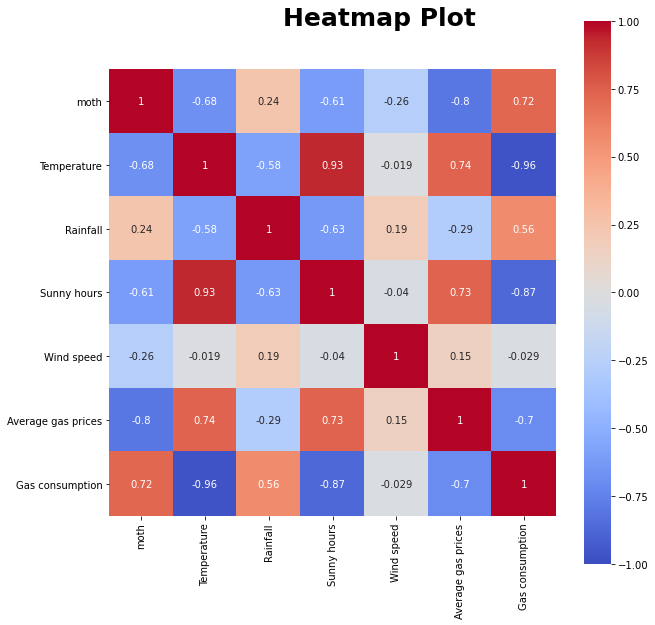

In [6]:
plt.figure(figsize=(10,10))
sn.heatmap(dataset.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);
plt.suptitle('Heatmap Plot',fontsize=25, fontweight='bold', y=0.9)

## 3-2 Pair Plot

<Figure size 1440x1440 with 0 Axes>

Text(0.5, 1.05, 'Pair Plot')

<Figure size 1440x1440 with 0 Axes>

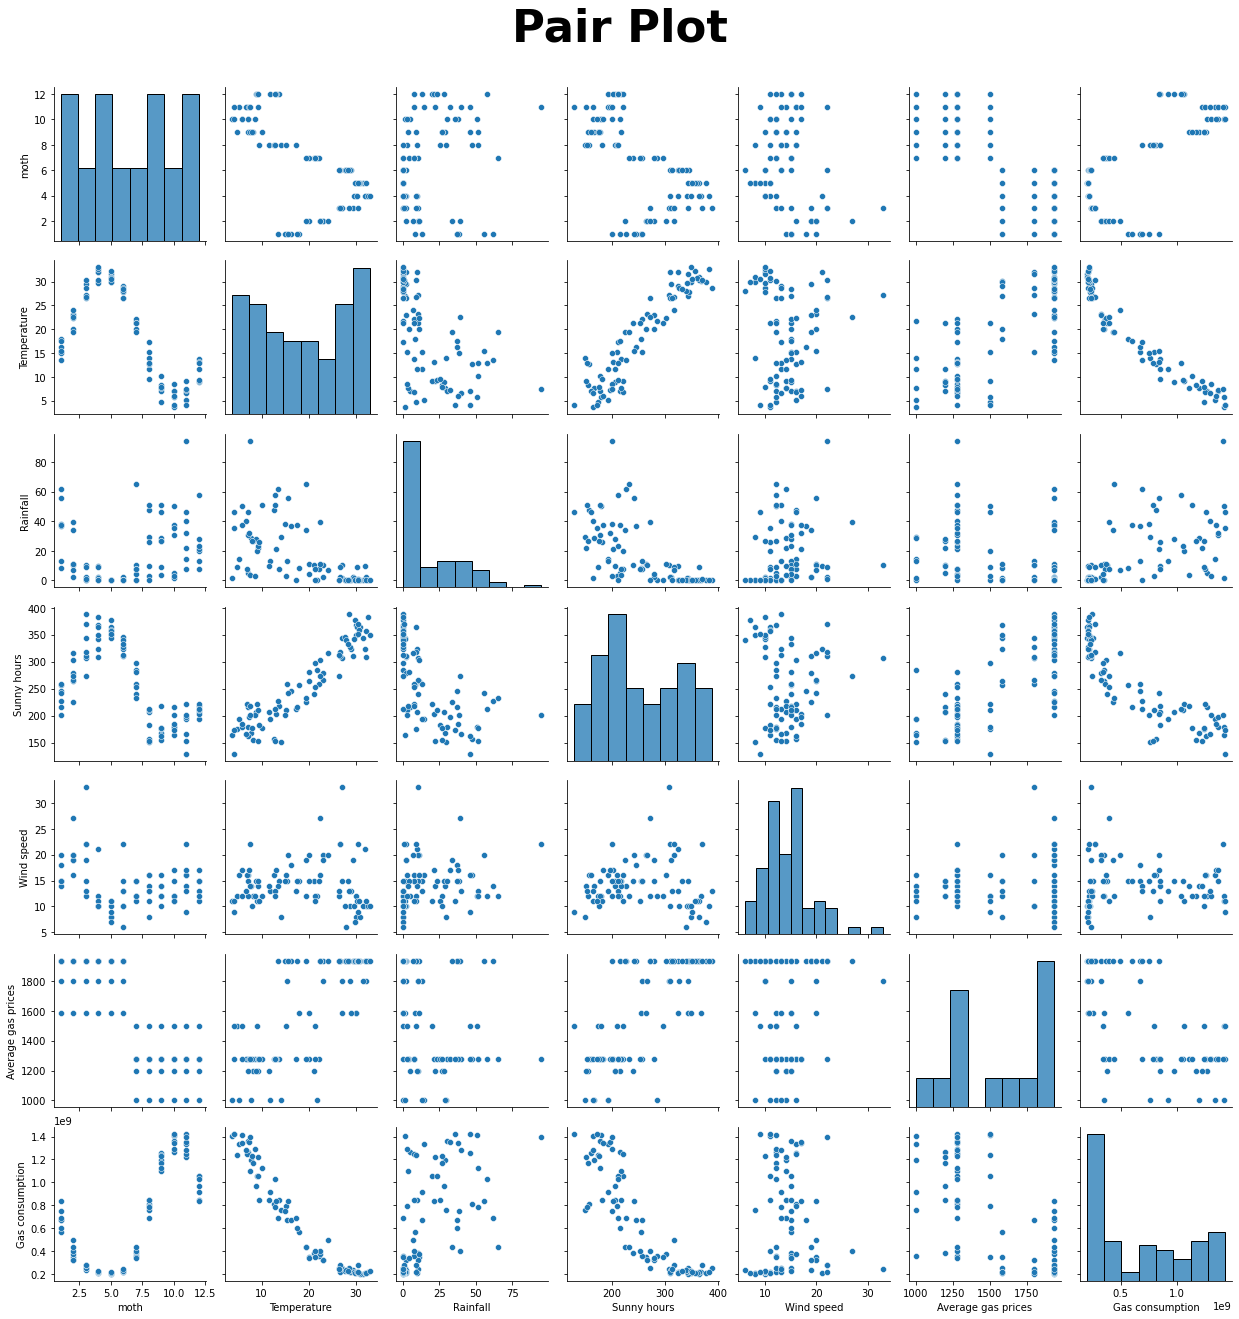

In [7]:
plt.figure(figsize=(20,20))
sn_plot = sn.pairplot(dataset)
plt.suptitle('Pair Plot',fontsize=45, fontweight='bold', y=1.05)
plt.show()
sn_plot.savefig('MLPNN_Results\Correlation-statistical-distributions-Plot',dpi=100)

In [7]:
dataset.head()

,Date,moth,Temperature,Rainfall,Sunny hours,Wind speed,Average gas prices,Gas consumption
0,1/1/1392,1,18.0,8.4,256.0,15,1585,566879336
1,1/2/1392,2,20.0,11.4,264.4,20,1585,351061815
2,1/3/1392,3,27.0,1.8,344.0,15,1585,254324764
3,1/4/1392,4,30.1,0.0,367.6,12,1585,219003605
4,1/5/1392,5,30.0,0.0,349.0,8,1585,209640400


In [8]:
# List of sorted correlation of variables to the target
dataset1Corr=pd.DataFrame(dataset.corr().unstack().sort_values(ascending=False)['Gas consumption']
                     ,columns=['Correlation to the target'])
dataset1Corr.style.background_gradient(cmap=sn.light_palette("red", as_cmap=True))

,Correlation to the target
Gas consumption,1.000000
moth,0.722293
Rainfall,0.564427
Wind speed,-0.028513
Average gas prices,-0.698005
Sunny hours,-0.870887
Temperature,-0.961221


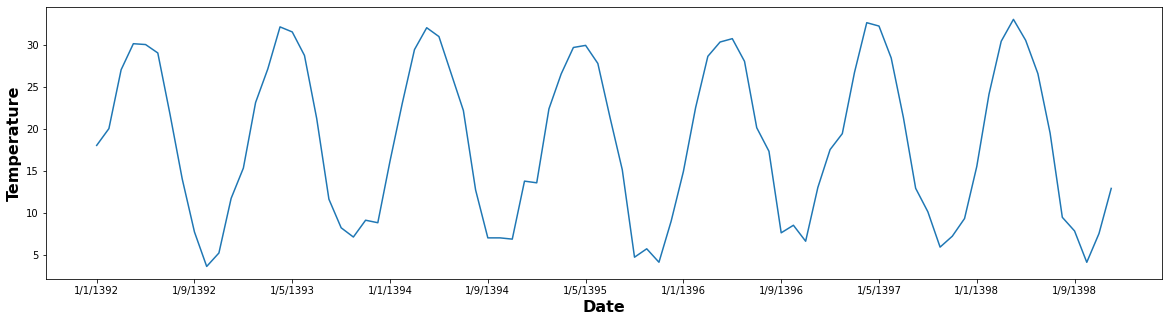

In [9]:
# repartition of the Temperature by Date
plt.figure(figsize=(20,5))
plt.plot(dataset['Date'] , dataset['Temperature']);
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.xlabel('Date', fontsize=16, fontweight='bold');
plt.ylabel('Temperature', fontsize=16, fontweight='bold');
plt.savefig('MLPNN_Results\Date vs Temperature',dpi=300);


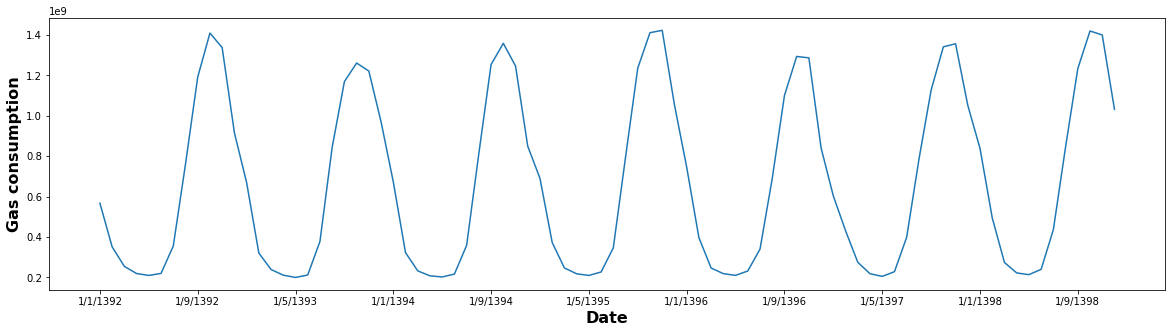

In [10]:
# repartition of the Gas consumption by Date
plt.figure(figsize=(20,5))
plt.plot(dataset['Date'] , dataset['Gas consumption']);
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.xlabel('Date', fontsize=16, fontweight='bold');
plt.ylabel('Gas consumption', fontsize=16, fontweight='bold');
plt.savefig('MLPNN_Results\Date vs Gas consumption',dpi=300);

In [11]:
# Delays
Delays = [12]
Delays = np.array(Delays)

# type(Delays)

# Size of Delay Matrix
nDelay = Delays.size
# nDelay

# Number of Steps Ahead (Predicting Months Ahead)
Step = 0

# Maximum of Delays
MaxDelay = Delays.max()
# MaxDelay

# Number of Columns of X (Rows of Main Data-set)
N = rows

# Range of Time-Series for this Delays and Months Ahead
Range = np.arange(MaxDelay, N-Step)
Range

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
       46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,
       63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
       80, 81, 82, 83])

In [12]:
inputs_New = dataset.iloc[Range - Delays,:]
inputs_New

,Date,moth,Temperature,Rainfall,Sunny hours,Wind speed,Average gas prices,Gas consumption
0,1/1/1392,1,18.0,8.4,256.0,15,1585,566879336
1,1/2/1392,2,20.0,11.4,264.4,20,1585,351061815
2,1/3/1392,3,27.0,1.8,344.0,15,1585,254324764
3,1/4/1392,4,30.1,0.0,367.6,12,1585,219003605
4,1/5/1392,5,30.0,0.0,349.0,8,1585,209640400
...,...,...,...,...,...,...,...,...
67,1/8/1397,8,12.9,51.2,153.7,13,1275,783088656
68,1/9/1397,9,10.1,51.2,177.6,12,1275,1127047863
69,1/10/1397,10,5.9,37.7,184.8,17,1275,1341412053
70,1/11/1397,11,7.2,32.4,196.5,17,1275,1356620835


In [13]:
targets_New = Y.iloc[Range + Step,:]
targets_New

,Gas consumption
12,669771959
13,320478974
14,238988857
15,210907265
16,199668290
...,...
79,845586843
80,1233576758
81,1419858641
82,1400085032


# 4 - Pre-Procesing The Data-set and 

In [14]:
scaler1 = MinMaxScaler(feature_range=(0.1, 1))
inputsN = scaler1.fit_transform(inputs_New.drop('Date',1))
inputsN = pd.DataFrame(inputsN, columns=inputs_New.drop('Date',1).columns)
inputsN.head()

,moth,Temperature,Rainfall,Sunny hours,Wind speed,Average gas prices,Gas consumption
0,0.100000,0.546897,0.222330,0.540632,0.400000,0.663102,0.370152
1,0.181818,0.608966,0.266019,0.569776,0.566667,0.663102,0.211378
2,0.263636,0.826207,0.126214,0.845952,0.400000,0.663102,0.140210
3,0.345455,0.922414,0.100000,0.927833,0.300000,0.663102,0.114225
4,0.427273,0.919310,0.100000,0.863300,0.166667,0.663102,0.107336


In [15]:
scaler2 = MinMaxScaler(feature_range=(0, 1))
targets = pd.DataFrame(targets_New)
targetsN = scaler2.fit_transform(targets_New)
targetsN = pd.DataFrame(targetsN, columns=targets_New.columns)
targetsN.head()

,Gas consumption
0,0.384276
1,0.098754
2,0.032142
3,0.009187
4,0.000000


In [16]:
w1 = int(input('Do you want to use Normalized Input? Enter 1=Yes, 0=No '))
if w1==1:
    print('\nNormal Data is selected')
    inputs  = inputsN.copy()
    targets = targetsN.copy()
else:
    print('\nOriginal Data is selected')
    inputs  = inputs_New.drop('Date',1).copy()
    targets = targets_New.copy()

Do you want to use Normalized Input? Enter 1=Yes, 0=No 1

Normal Data is selected


# 5 - Select Train & Test Data-sets

In [17]:
train_size = 0.8
R = int(np.round(inputs_New.shape[0] * train_size))

In [18]:
w2 = int(input('Do you want to use Random Train and Test Datasets? Enter 1=Yes, 0=No '))
if w2==1:
    print('\nRandom Train and Test Datasets selected')
    xtrain, xtest, ytrain, ytest = train_test_split(inputs, targets, test_size=1-train_size, random_state=None)

else:
    print('\nOriginal Train and Test Datasets selected')
    xtrain = inputs.iloc[:R,:]
    xtest = inputs.iloc[R:,:]
    ytrain = targets.iloc[:R,:]
    ytest = targets.iloc[R:,:]

Do you want to use Random Train and Test Datasets? Enter 1=Yes, 0=No 0

Original Train and Test Datasets selected


In [19]:
xtrain

,moth,Temperature,Rainfall,Sunny hours,Wind speed,Average gas prices,Gas consumption
0,0.100000,0.546897,0.222330,0.540632,0.400000,0.663102,0.370152
1,0.181818,0.608966,0.266019,0.569776,0.566667,0.663102,0.211378
2,0.263636,0.826207,0.126214,0.845952,0.400000,0.663102,0.140210
3,0.345455,0.922414,0.100000,0.927833,0.300000,0.663102,0.114225
4,0.427273,0.919310,0.100000,0.863300,0.166667,0.663102,0.107336
5,0.509091,0.888276,0.100000,0.777602,0.333333,0.663102,0.114734
6,0.590909,0.661724,0.100000,0.640555,0.300000,0.100000,0.214333
7,0.672727,0.422759,0.528155,0.174248,0.166667,0.100000,0.512583
8,0.754545,0.227241,0.522330,0.231843,0.366667,0.100000,0.829741
9,0.836364,0.100000,0.127670,0.224210,0.266667,0.100000,0.990065


In [20]:
xtest

,moth,Temperature,Rainfall,Sunny hours,Wind speed,Average gas prices,Gas consumption
58,0.918182,0.193103,0.683981,0.225251,0.333333,0.364706,0.899766
59,1.000000,0.391724,0.411650,0.355012,0.466667,0.364706,0.571381
60,0.100000,0.531379,0.641748,0.399769,0.400000,1.000000,0.396838
61,0.181818,0.590345,0.593689,0.435505,0.533333,1.000000,0.270194
62,0.263636,0.816897,0.229612,0.754356,0.633333,1.000000,0.155268
63,0.345455,1.000000,0.100000,0.979530,0.233333,1.000000,0.113565
64,0.427273,0.987586,0.100000,0.889668,0.266667,1.000000,0.103807
65,0.509091,0.869655,0.102913,0.805359,0.400000,1.000000,0.120988
66,0.590909,0.649310,0.210680,0.530571,0.266667,0.364706,0.246304
67,0.672727,0.388621,0.845631,0.185698,0.333333,0.364706,0.529214


In [21]:
ytrain

,Gas consumption
0,0.384276
1,0.098754
2,0.032142
3,0.009187
4,0.000000
5,0.009815
6,0.145662
7,0.526647
8,0.792525
9,0.867875


In [22]:
ytest

,Gas consumption
58,0.945725
59,0.696555
60,0.522119
61,0.241205
62,0.060521
63,0.018292
64,0.011235
65,0.032724
66,0.193290
67,0.527992


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
print(f"xtrain_Size = {xtrain.shape}")
print(f"ytrain_Size = {ytrain.shape}")
print(f"xtest_Size  = {xtest.shape}")
print(f"ytest_Size  = {ytest.shape}")

xtrain_Size = (58, 7)
ytrain_Size = (58, 1)
xtest_Size  = (14, 7)
ytest_Size  = (14, 1)


In [25]:
from sklearn.neural_network import MLPRegressor

In [26]:
MLP=MLPRegressor()
from sklearn.model_selection import GridSearchCV

In [27]:
random_grid= {'hidden_layer_sizes':[[100,150],100,250] ,
              'activation':['relu', 'tanh','logistic'],
              'solver':['lbfgs','sgd','adam'] ,
               
              'max_iter':[100,200,300], 
              'n_iter_no_change':[50,100,150],
              
             }

GS=GridSearchCV(estimator=MLP,param_grid= random_grid,scoring='r2',cv=5)

In [ ]:
GS.fit(xtrain,ytrain)

In [ ]:
GS.best_params_

In [ ]:
GS.best_score_

In [36]:
regr = MLPRegressor(
                    hidden_layer_sizes=[150,200], 
                    activation='tanh', 
                    solver='lbfgs',  
                    max_iter=300, 
                    n_iter_no_change=150
                    )


In [37]:
regr.fit(xtrain,ytrain)

MLPRegressor(activation='tanh', hidden_layer_sizes=[150, 200], max_iter=300,
             n_iter_no_change=150, solver='lbfgs')

In [38]:
y_tr_pred=regr.predict(xtrain)


In [39]:
kf = KFold(n_splits=5, random_state=10, shuffle=False)
RMSE_TR = []
RMSE_TS = []
MLPNN = []
R2_TR = []
R2_TS= []
for train_index, test_index in kf.split(xtrain):
    i = 0
    
    X_tr, X_ts = xtrain.iloc[train_index,:], xtrain.iloc[test_index,:]
    y_tr, y_ts = ytrain.iloc[train_index], ytrain.iloc[test_index]
    
    regr.fit(X_tr, y_tr)
    
    y_tr_prd = regr.predict(X_tr)
    y_ts_prd = regr.predict(X_ts)
    
    RMSE_tr   = np.sqrt(metrics.mean_squared_error(y_tr, y_tr_prd))
    RMSE_ts   = np.sqrt(metrics.mean_squared_error(y_ts, y_ts_prd))
    R2_tr= metrics.r2_score(y_tr, y_tr_prd)
    R2_ts= metrics.r2_score(y_ts, y_ts_prd)
    

    i += 1
    
    RMSE_TR.append(RMSE_tr)
    RMSE_TS.append(RMSE_ts)
    R2_TR.append(R2_tr)
    R2_TS.append(R2_ts)
    MLPNN.append(regr)

MLPRegressor(activation='tanh', hidden_layer_sizes=[150, 200], max_iter=300,
             n_iter_no_change=150, solver='lbfgs')

MLPRegressor(activation='tanh', hidden_layer_sizes=[150, 200], max_iter=300,
             n_iter_no_change=150, solver='lbfgs')

MLPRegressor(activation='tanh', hidden_layer_sizes=[150, 200], max_iter=300,
             n_iter_no_change=150, solver='lbfgs')

MLPRegressor(activation='tanh', hidden_layer_sizes=[150, 200], max_iter=300,
             n_iter_no_change=150, solver='lbfgs')

MLPRegressor(activation='tanh', hidden_layer_sizes=[150, 200], max_iter=300,
             n_iter_no_change=150, solver='lbfgs')

In [40]:
Idx = RMSE_TS.index(min(RMSE_TS))
Idx

1

In [41]:
MLPNet = MLPNN[Idx]
MLPNet

MLPRegressor(activation='tanh', hidden_layer_sizes=[150, 200], max_iter=300,
             n_iter_no_change=150, solver='lbfgs')

In [42]:
RMSE_TR

[0.052785482931193006,
 0.05779321740264624,
 0.04912414738422624,
 0.05734046676904502,
 0.04528918178255443]

In [43]:
RMSE_TS

[0.09494097307002664,
 0.055904553749655736,
 0.09361260005065669,
 0.06890700352854078,
 0.08799056025351279]

In [44]:
R2_TR

[0.9769359325102766,
 0.9716962414714702,
 0.9785468015276801,
 0.972669979035518,
 0.9836070875599935]

In [45]:
R2_TS

[0.9209823324214524,
 0.9749505467168407,
 0.9390922193284921,
 0.9588068177497874,
 0.9167977270979321]

In [46]:
Date_New = dataset.iloc[Range + Step,0]
Date_New

12     1/1/1393
13     1/2/1393
14     1/3/1393
15     1/4/1393
16     1/5/1393
        ...    
79     1/8/1398
80     1/9/1398
81    1/10/1398
82    1/11/1398
83    1/12/1398
Name: Date, Length: 72, dtype: object

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [49]:
ytrain_prd = abs(MLPNet.predict(xtrain))

In [51]:
##################################### Denormalization #####################################
if w1==1:
    DeNorm_ytrain  = scaler2.inverse_transform(ytrain)
    DeNorm_ytrain = pd.DataFrame(DeNorm_ytrain, index=ytrain.index)
    
    DeNorm_ytrain_prd  = scaler2.inverse_transform(ytrain_prd.reshape(-1, 1))
    DeNorm_ytrain_prd = pd.DataFrame(DeNorm_ytrain_prd, index=ytrain.index)

else:
    DeNorm_ytrain = ytrain
    DeNorm_ytrain_prd = ytrain_prd
    DeNorm_ytrain_prd = pd.DataFrame(DeNorm_ytrain_prd, index=ytrain.index)

In [52]:
df_train = pd.concat([DeNorm_ytrain, DeNorm_ytrain_prd], axis=1)
df_train.columns=['Actual_Train', 'Predicted_Train']
df_train.sort_index(inplace=True)
XTicksTR = Date_New.iloc[df_train.index]
df_train.index = XTicksTR
writer = pd.ExcelWriter('C:/Users/SONY/Desktop/Master-Thesis/New code/final_code/MLP_result/Train_Targets_Outputs_Results.xlsx')
df_train.to_excel(writer, sheet_name='Train_Results')
writer.save()
df_train

,Actual_Train,Predicted_Train
Date,,
1/1/1393,6.697720e+08,6.114653e+08
1/2/1393,3.204790e+08,3.141845e+08
1/3/1393,2.389889e+08,2.603226e+08
1/4/1393,2.109073e+08,2.386632e+08
1/5/1393,1.996683e+08,2.261286e+08
1/6/1393,2.116753e+08,2.269469e+08
1/7/1393,3.778634e+08,3.663647e+08
1/8/1393,8.439413e+08,7.807281e+08
1/9/1393,1.169204e+09,1.155839e+09


# 11 - Train Results

In [53]:
# Calculate Train Results
MSE_train  = metrics.mean_squared_error(ytrain, ytrain_prd)
RMSE_train = np.sqrt(metrics.mean_squared_error(ytrain, ytrain_prd))
MAE_train  = metrics.mean_absolute_error(ytrain, ytrain_prd)

# Print Train Results
print("\n"+"*"*25+" Train Results "+"*"*25)
print(f"MSE_Train = {MSE_train}")
print(f"RMSE_Train = {RMSE_train}")
print(f"MAE_Train = {MAE_train}")

# Export Train Results to Text File
print("*"*25+" Train Results "+"*"*25, file=open('C:/Users/SONY/Desktop/Master-Thesis/New code/final_code/MLP_result/Train Results.txt', 'w'))
print(f"MSE_Train   = {MSE_train}", file=open('C:/Users/SONY/Desktop/Master-Thesis/New code/final_code/MLP_result/Train Results.txt', 'a'))
print(f"RMSE_Train = {RMSE_train}", file=open('C:/Users/SONY/Desktop/Master-Thesis/New code/final_code/MLP_result/Train Results.txt', 'a'))
print(f"MAE_Train  = {MAE_train}", file=open('C:/Users/SONY/Desktop/Master-Thesis/New code/final_code/MLP_result/Train Results.txt', 'a'))


************************* Train Results *************************
MSE_Train = 0.0030993167544548536
RMSE_Train = 0.055671507564056984
MAE_Train = 0.03492993315192891


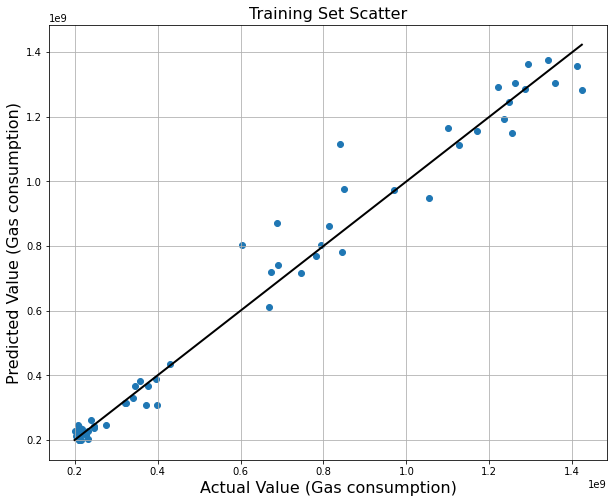

In [54]:
plt.figure(figsize=(10,8))
plt.scatter(DeNorm_ytrain, DeNorm_ytrain_prd)
MIN = min(float(DeNorm_ytrain.min()),float(DeNorm_ytrain_prd.min()))
MAX = max(float(DeNorm_ytrain.max()),float(DeNorm_ytrain_prd.max()))
plt.plot([MIN,MAX],[MIN,MAX],linewidth=2, markersize=12, color='black')
plt.title("Training Set Scatter", fontsize=16)
plt.xlabel('Actual Value (Gas consumption)', fontsize=16)
plt.ylabel('Predicted Value (Gas consumption)', fontsize=16)
plt.grid(which='major', axis='both')
# plt.xlim(MIN,MAX)
# plt.ylim(MIN,MAX)
plt.savefig('C:/Users/SONY/Desktop/Master-Thesis/New code/final_code/MLP_result/Training_Set_Scatter',dpi=300);

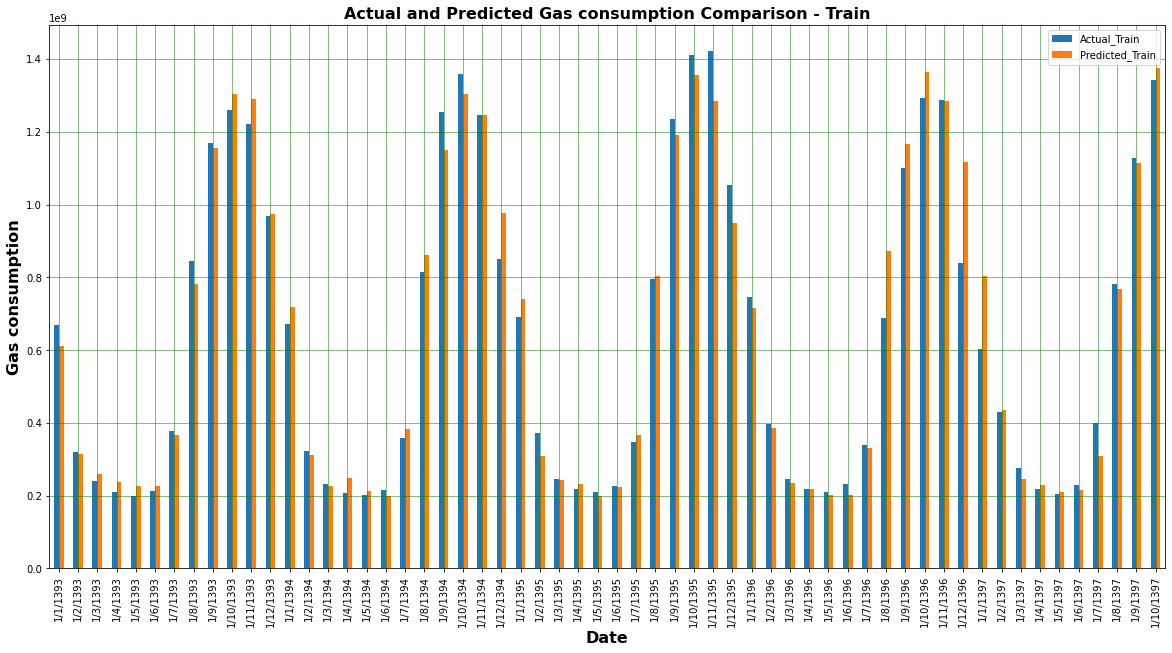

In [55]:
df_train.plot(kind='bar',figsize=(20,10))
plt.title("Actual and Predicted Gas consumption Comparison - Train", fontsize=16, fontweight='bold')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("Date", fontsize=16, fontweight='bold')
plt.ylabel("Gas consumption", fontsize=16, fontweight='bold')
plt.savefig('C:/Users/SONY/Desktop/Master-Thesis/New code/final_code/MLP_result/Actual_Predicted_Comparison_Train_Figure',dpi=300)
plt.show();

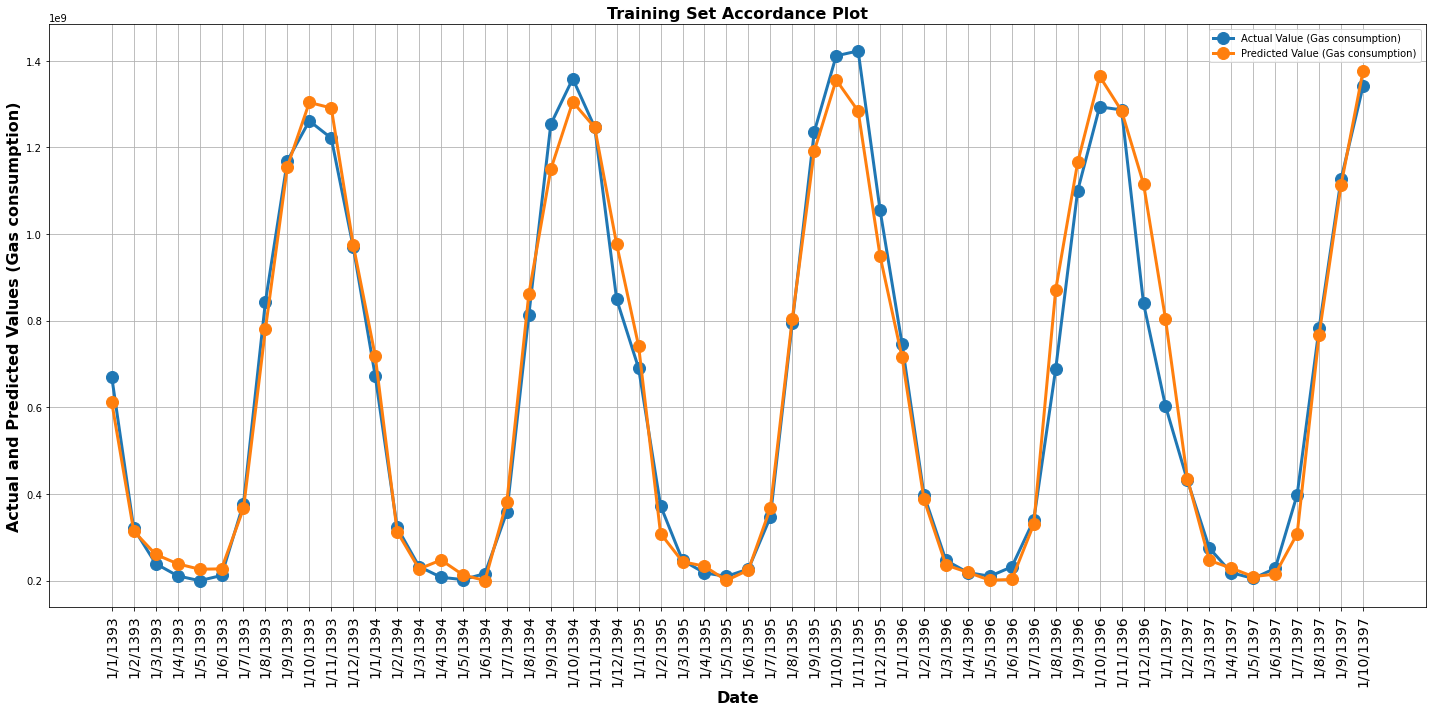

In [56]:
##################################### Train Accordance Plot #####################################
dfTR = df_train
plt.figure(figsize=(20,10))
plt.plot(dfTR['Actual_Train'], '-o', linewidth=3, markersize=12, label='Actual Value (Gas consumption)')
plt.plot(dfTR['Predicted_Train'], '-o', linewidth=3, markersize=12, label='Predicted Value (Gas consumption)')
ax = plt.axes()
ax.set(xticklabels=df_train.index)
plt.xticks(fontsize=14, rotation=90)
plt.grid(which='major', axis='both')
plt.title("Training Set Accordance Plot", fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.ylabel('Actual and Predicted Values (Gas consumption)', fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig('C:/Users/SONY/Desktop/Master-Thesis/New code/final_code/MLP_result/Training_Set_Accordance_Plot',dpi=300);
plt.show();

In [58]:
ytest_prd = abs(MLPNet.predict(xtest))

In [59]:
##################################### Denormalization #####################################
if w1==1:
    DeNorm_ytest  = scaler2.inverse_transform(ytest)
    DeNorm_ytest = pd.DataFrame(DeNorm_ytest, index=ytest.index)
    
    DeNorm_ytest_prd  = scaler2.inverse_transform(ytest_prd.reshape(-1, 1))
    DeNorm_ytest_prd = pd.DataFrame(DeNorm_ytest_prd, index=ytest.index)

else:
    DeNorm_ytest = ytest
    DeNorm_ytest_pr
    d = ytest_prd
    DeNorm_ytest_prd = pd.DataFrame(DeNorm_ytest_prd, index=ytest.index)

In [60]:
df_test = pd.concat([DeNorm_ytest, DeNorm_ytest_prd], axis=1)
df_test.columns=['Actual_Test', 'Predicted_Test']
df_test.sort_index(inplace=True)
XTicksTS = Date_New.iloc[df_test.index]
df_test.index = XTicksTS
writer = pd.ExcelWriter('C:/Users/SONY/Desktop/Master-Thesis/New code/final_code/MLP_result/Test_Targets_Outputs_Results.xlsx')
df_test.to_excel(writer, sheet_name='Test_Results')
writer.save()
df_test

,Actual_Test,Predicted_Test
Date,,
1/11/1397,1.356621e+09,1.247089e+09
1/12/1397,1.051798e+09,9.060111e+08
1/1/1398,8.384021e+08,6.621151e+08
1/2/1398,4.947459e+08,4.373057e+08
1/3/1398,2.737068e+08,2.804977e+08
1/4/1398,2.220453e+08,2.411578e+08
1/5/1398,2.134130e+08,2.173643e+08
1/6/1398,2.397010e+08,2.123127e+08
1/7/1398,4.361294e+08,4.196503e+08


In [61]:
# Calculate Test Results
MSE_test  = metrics.mean_squared_error(ytest, ytest_prd)
RMSE_test = np.sqrt(metrics.mean_squared_error(ytest, ytest_prd))
MAE_test  = metrics.mean_absolute_error(ytest, ytest_prd)

# Print Test Results
print("\n"+"*"*25+" Test Results "+"*"*25)
print(f"MSE_Test   = {MSE_test}")
print(f"RMSE_Test = {RMSE_test}")
print(f"MAE_Test  = {MAE_test}")

# Export Test Results to Text File
print("*"*25+" Test Results "+"*"*25, file=open('C:/Users/SONY/Desktop/Master-Thesis/New code/final_code/MLP_result/Test Results.txt', 'w'))
print(f"MSE_Test   = {MSE_test}", file=open('C:/Users/SONY/Desktop/Master-Thesis/New code/final_code/MLP_result/Test Results.txt', 'a'))
print(f"RMSE_Test = {RMSE_test}", file=open('C:/Users/SONY/Desktop/Master-Thesis/New code/final_code/MLP_result/Test Results.txt', 'a'))
print(f"MAE_Test  = {MAE_test}", file=open('C:/Users/SONY/Desktop/Master-Thesis/New code/final_code/MLP_result/Test Results.txt', 'a'))


************************* Test Results *************************
MSE_Test   = 0.00481576110802438
RMSE_Test = 0.06939568508217482
MAE_Test  = 0.054117641478985457


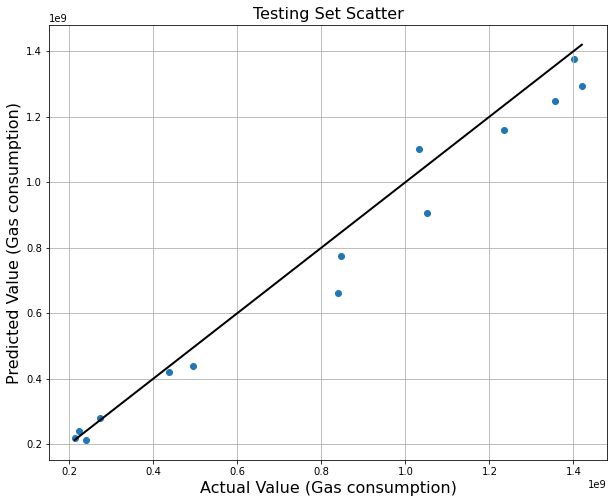

In [62]:
plt.figure(figsize=(10,8))
plt.scatter(DeNorm_ytest, DeNorm_ytest_prd)
MIN = min(float(DeNorm_ytest.min()),float(DeNorm_ytest_prd.min()))
MAX = max(float(DeNorm_ytest.max()),float(DeNorm_ytest_prd.max()))
plt.plot([MIN,MAX],[MIN,MAX],linewidth=2, markersize=12, color='black')
plt.title("Testing Set Scatter", fontsize=16)
plt.xlabel('Actual Value (Gas consumption)', fontsize=16)
plt.ylabel('Predicted Value (Gas consumption)', fontsize=16)
plt.grid(which='major', axis='both')
# plt.xlim(MIN,MAX)
# plt.ylim(MIN,MAX)
plt.savefig('C:/Users/SONY/Desktop/Master-Thesis/New code/final_code/MLP_result/Testing_Set_Scatter',dpi=300);

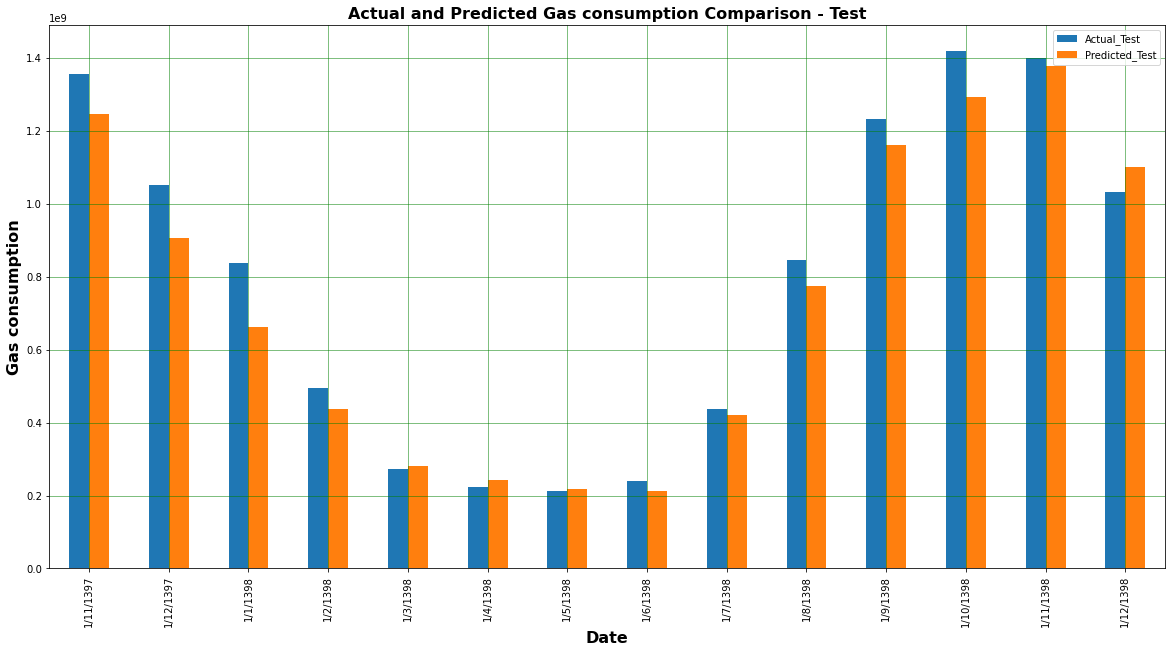

In [63]:
df_test.plot(kind='bar',figsize=(20,10))
plt.title("Actual and Predicted Gas consumption Comparison - Test", fontsize=16, fontweight='bold')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("Date", fontsize=16, fontweight='bold')
plt.ylabel("Gas consumption", fontsize=16, fontweight='bold')
plt.savefig('C:/Users/SONY/Desktop/Master-Thesis/New code/final_code/MLP_result/Actual_Predicted_Comparison_Test_Figure',dpi=300)
plt.show();

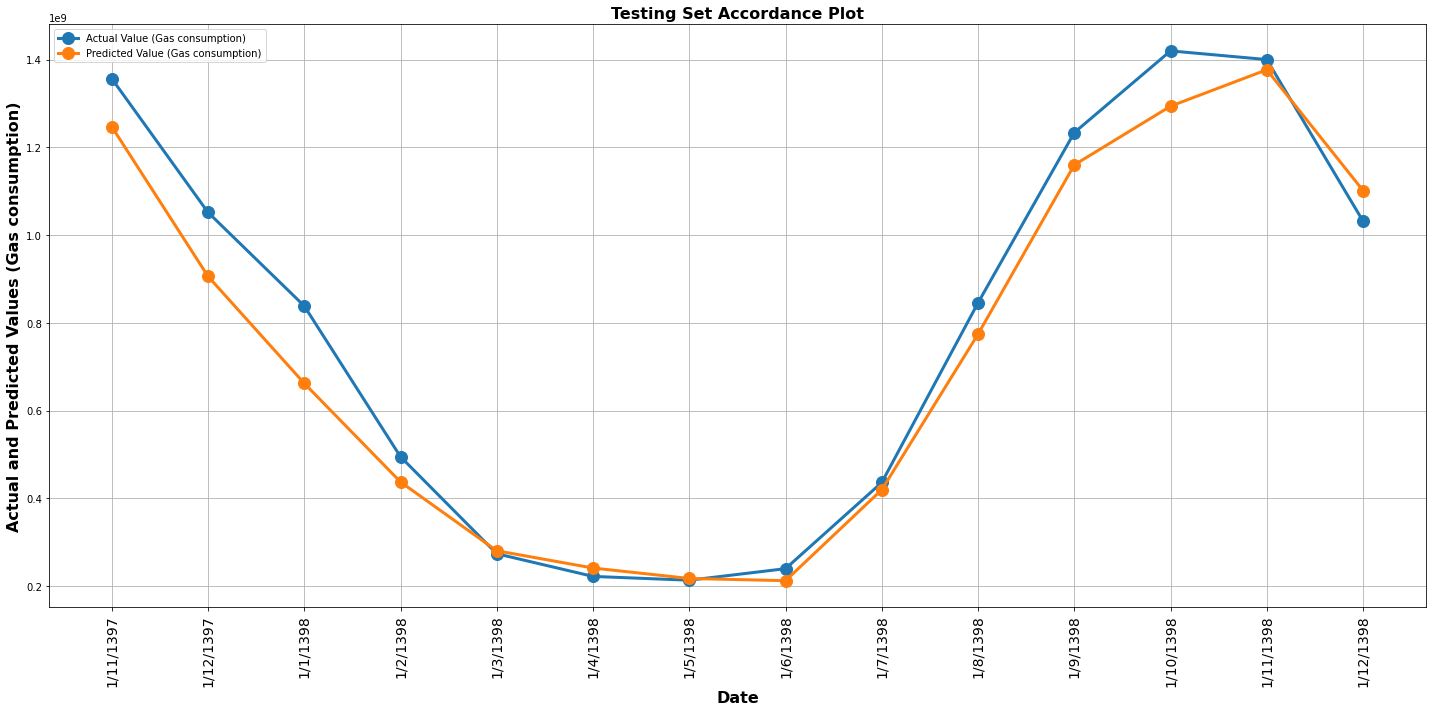

In [64]:
##################################### Test Accordance Plot #####################################
dfTS = df_test
plt.figure(figsize=(20,10))
plt.plot(dfTS['Actual_Test'], '-o', linewidth=3, markersize=12, label='Actual Value (Gas consumption)')
plt.plot(dfTS['Predicted_Test'], '-o', linewidth=3, markersize=12, label='Predicted Value (Gas consumption)')
ax = plt.axes()
ax.set(xticklabels=df_test.index) 
plt.xticks(fontsize=14, rotation=90)
plt.grid(which='major', axis='both')
plt.title("Testing Set Accordance Plot", fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.ylabel('Actual and Predicted Values (Gas consumption)', fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig('C:/Users/SONY/Desktop/Master-Thesis/New code/final_code/MLP_result/Testing_Set_Accordance_Plot',dpi=300);
plt.show();